<h3 style="text-align: center;">Logistic regression (binary classification) with pytorch</h3>

In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k',zorder=2)
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k',zorder=2)

def display(m, b, color='g--'):
    #plt.xlim(-0.05,1.05)
    #plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color,zorder=1)

In [3]:
#array data points: x1, x2
data = np.array([
    [1,10,1],
    [3,10,0],
    [1.8,2.0,0],
    [-1,-1,1],
    [-2,10,1],
])          #np.float64 -> .double()
X = data[:, [0,1]]
T = data[:, [2]]

datamin = np.min(X, axis=0)
datamax = np.max(X, axis=0)
xmin, ymin = datamin
xmax, ymax = datamax

#convert to tensor
X = torch.from_numpy(X)
T = torch.from_numpy(T)

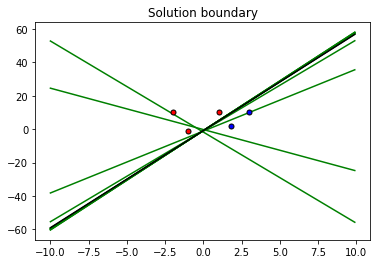

last loss tensor(0.1807, dtype=torch.float64, grad_fn=<MeanBackward1>)


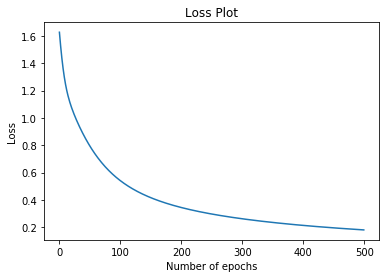

In [6]:
torch.manual_seed(1)

#sigmoid
def sigmoid(x):
    return 1/(1+torch.exp(-x))

# Loss (cross entropy) error function
def error(target, output):
    return -target * torch.log(output) - (1-target) * torch.log(1-output)

#alternative
#criterion = torch.nn.BCEWithLogitsLoss()

#random weights
W = Variable(torch.randn(1, 2, dtype=torch.double), requires_grad=True)
b = Variable(torch.randn(1, 1, dtype=torch.double), requires_grad=True)
#determined weights
#W = Variable(torch.DoubleTensor([[1,1]]), requires_grad=True)
#b = Variable(torch.DoubleTensor([[1]]), requires_grad=True)

#learn rate
alpha = 0.01
#iterations
epochs = 500

lossHistory = []
solutionHistory = []

for i in range(epochs):    
    #out = torch.nn.Sigmoid()(torch.mm(X, W.view(2,1))+b)
    out = sigmoid(torch.mm(X, W.view(2,1))+b)
    err = error(T,out)
    loss = torch.mean(err)

    #alternative
    #out = torch.mm(X, W.view(2,1))+b
    #loss = criterion(out, T.double())     
    
    lossHistory.append(loss)
    
    #compute gradients
    loss.backward()

    last_w = W.data.numpy()[0].copy()
    last_b = b.data.numpy()[0].copy()
    
    solutionHistory.append([last_w,last_b])
    
    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    # An alternative way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    # https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
    
    with torch.no_grad():
        W -= alpha * W.grad
        b -= alpha * b.grad

        # Manually zero the gradients after updating weights
        W.grad.zero_()
        b.grad.zero_()

# Plotting some lines before the final solution        
for i in range(0,epochs,50):
    rec = solutionHistory[i]
    w0 = rec[0][0]
    w1 = rec[0][1]
    b = rec[1][0]    
    display(-w0/w1, -b/w1, 'green')

# Plotting the solution boundary (last generated line)    
rec = solutionHistory[len(solutionHistory)-1]
w0 = rec[0][0]
w1 = rec[0][1]
b = rec[1][0]
plt.title("Solution boundary")
display(-w0/w1, -b/w1, 'black')

# Plotting the data
plot_points(X.numpy(), T.numpy())
plt.show()        
        
print("last loss",loss)  

# Plotting the loss (error)
plt.title("Loss Plot")
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.plot(lossHistory)
plt.show()        